# Workshop 2: Data Cleansing with Spark

Workshop 2 ใช้ PySpark, Spark SQL, Pandas จัดการข้อมูล เช่น Clean Data, EDA, Dat Profiling

# Step 1) ติดตั้ง Spark และ PySpark

In [1]:
!apt-get update                                                                          # อัพเดท Package ทั้งหมดใน VM ตัวนี้
!apt-get install openjdk-8-jdk-headless -qq > /dev/null                                  # ติดตั้ง Java Development Kit (จำเป็นสำหรับการติดตั้ง Spark)
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz # ติดตั้ง Spark 3.1.2
!tar xzvf spark-3.1.2-bin-hadoop2.7.tgz                                                  # Unzip ไฟล์ Spark 3.1.2
!pip install -q findspark==1.3.0

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [89.9 kB]
Get:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Ge

In [2]:
# Set enviroment variable เพื่อให้ Python รู้จัก Spark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK}_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"

In [3]:
# ติดตั้ง PySpark 
!pip install pyspark==3.1.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 212.4 MB 54 kB/s 
     |████████████████████████████████| 198 kB 36.9 MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880769 sha256=4939f968897eec5ec4ac877e94345a48987d77788e40f397010e04e34fc9e8f6
  Stored in directory: /root/.cache/pip/wheels/a5/0a/c1/9561f6fecb759579a7d863dcd846daaa95f598744e71b02c77
Successfully built pyspark


## เริ่มใช้งาน Spark

In [4]:
# Server Google Colab มีกี่ Core
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2200.000
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	: 4400.00
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 b

ตั้งค่า lcoal[*] เพื่อ Spark ใช้งาน Multi_core ใน Spark ใช้ CPU ทุก Core

In [5]:
# Spark Session 
from pyspark.sql import SparkSession
spark = SparkSession.builder.master('local[*]').getOrCreate()

In [6]:
# version python
import sys
sys.version_info

sys.version_info(major=3, minor=7, micro=13, releaselevel='final', serial=0)

## Load Data

wget = คำสั่งในการดาวน์โหลดไฟล์

wget -O = ตั้งชื่อไฟล์

In [7]:
# Download Data File
!wget -O data.zip https://file.designil.com/zdOfUE+
!unzip data.zip

--2022-08-14 01:14:40--  https://file.designil.com/zdOfUE+
Resolving file.designil.com (file.designil.com)... 104.21.8.81, 172.67.130.97, 2606:4700:3031::6815:851, ...
Connecting to file.designil.com (file.designil.com)|104.21.8.81|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-std.droplr.net/files/acc_513973/zdOfUE [following]
--2022-08-14 01:14:40--  https://cdn-std.droplr.net/files/acc_513973/zdOfUE
Resolving cdn-std.droplr.net (cdn-std.droplr.net)... 108.156.107.32, 108.156.107.101, 108.156.107.113, ...
Connecting to cdn-std.droplr.net (cdn-std.droplr.net)|108.156.107.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6704411 (6.4M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>]   6.39M  14.3MB/s    in 0.4s    

2022-08-14 01:14:41 (14.3 MB/s) - ‘data.zip’ saved [6704411/6704411]

Archive:  data.zip
  inflating: ws2_data.csv            


### Load data เข้าใน Spark
ใช้ spark.read.csv เพื่ออ่านข้อูลจากไฟล์ csv

heater=True บรรทัดแรกในไฟล์ csv คือ Header 

inferSchema=True ตัว Spark จะกำหนด Type แต่ละคอลัมน์เป็นชนิดอะไร

In [8]:
data_book = spark.read.csv('/content/ws2_data.csv', header=True, 
                           inferSchema=True)

# Step 2) Data Profiling

ตรวจสอบ Column

In [9]:
data_book

DataFrame[timestamp: string, user_id: string, book_id: int, country: string, price: double]

In [10]:
data_book_backup = data_book

In [11]:
data_book.show()

+-------------------+--------+-------+--------------------+-----+
|          timestamp| user_id|book_id|             country|price|
+-------------------+--------+-------+--------------------+-----+
|2021-05-01 08:03:44|824dc295|      2|              Israel|24.95|
|2021-05-02 02:48:34|f80fe106|      6|            Thailand|31.49|
|2021-05-01 16:54:57|01cb9fe0|      9|               Italy|29.65|
|2021-05-01 21:45:28|59508f47|     13|        South Africa| 22.4|
|2021-05-01 14:50:52|3553ebbb|     14|              Canada| 28.0|
|2021-05-01 08:41:48|ea28260a|     16|United States of ...|31.18|
|2021-05-01 05:51:43|ff44767e|     18|United States of ...|59.99|
|2021-05-01 00:01:09|b07799e7|     20|              Canada| 28.0|
|2021-05-01 00:21:24|9d2e93c8|     20|             Hungary| 28.0|
|2021-05-01 01:34:23|612db483|     20|              Sweden| 28.0|
|2021-05-01 01:42:10|afad01ae|     20|              France| 28.0|
|2021-05-01 03:38:00|3b68cda1|     20|              Canada| 28.0|
|2021-05-0

In [12]:
# ข้อมูล 10 แถวแรก
data_book.show(10)

+-------------------+--------+-------+--------------------+-----+
|          timestamp| user_id|book_id|             country|price|
+-------------------+--------+-------+--------------------+-----+
|2021-05-01 08:03:44|824dc295|      2|              Israel|24.95|
|2021-05-02 02:48:34|f80fe106|      6|            Thailand|31.49|
|2021-05-01 16:54:57|01cb9fe0|      9|               Italy|29.65|
|2021-05-01 21:45:28|59508f47|     13|        South Africa| 22.4|
|2021-05-01 14:50:52|3553ebbb|     14|              Canada| 28.0|
|2021-05-01 08:41:48|ea28260a|     16|United States of ...|31.18|
|2021-05-01 05:51:43|ff44767e|     18|United States of ...|59.99|
|2021-05-01 00:01:09|b07799e7|     20|              Canada| 28.0|
|2021-05-01 00:21:24|9d2e93c8|     20|             Hungary| 28.0|
|2021-05-01 01:34:23|612db483|     20|              Sweden| 28.0|
+-------------------+--------+-------+--------------------+-----+
only showing top 10 rows



In [13]:
# Type ของ Column
data_book.dtypes

[('timestamp', 'string'),
 ('user_id', 'string'),
 ('book_id', 'int'),
 ('country', 'string'),
 ('price', 'double')]

In [14]:
data_book.printSchema()

root
 |-- timestamp: string (nullable = true)
 |-- user_id: string (nullable = true)
 |-- book_id: integer (nullable = true)
 |-- country: string (nullable = true)
 |-- price: double (nullable = true)



นับจำนวน Row และ column

In [15]:
print((data_book.count(), len(data_book.columns)))

(500000, 5)


ข้อมูลสถิติ

In [16]:
data_book.describe().show()

+-------+-------------------+--------+-----------------+-------+------------------+
|summary|          timestamp| user_id|          book_id|country|             price|
+-------+-------------------+--------+-----------------+-------+------------------+
|  count|             500000|  499998|           500000| 500000|            500000|
|   mean|               null|Infinity|       740.377786|   null|31.459311680039008|
| stddev|               null|     NaN|559.9366172146341|   null|10.945931459891705|
|    min|2021-05-01 00:00:04|00000f49|                1|Algeria|               0.0|
|    max|2021-07-31 23:59:55|ffffe3e7|             2269|  Yemen|              84.0|
+-------+-------------------+--------+-----------------+-------+------------------+



summary() แสดงค่าสถติที่ละเอียดขึ้น

In [17]:
data_book.summary().show()

+-------+-------------------+-----------+-----------------+-------+------------------+
|summary|          timestamp|    user_id|          book_id|country|             price|
+-------+-------------------+-----------+-----------------+-------+------------------+
|  count|             500000|     499998|           500000| 500000|            500000|
|   mean|               null|   Infinity|       740.377786|   null|31.459311680039008|
| stddev|               null|        NaN|559.9366172146341|   null|10.945931459891705|
|    min|2021-05-01 00:00:04|   00000f49|                1|Algeria|               0.0|
|    25%|               null|2.4050123E7|              262|   null|             24.95|
|    50%|               null|  7.04742E7|              614|   null|             29.99|
|    75%|               null|  5.5726E81|             1217|   null|             34.99|
|    max|2021-07-31 23:59:55|   ffffe3e7|             2269|  Yemen|              84.0|
+-------+-------------------+-----------+--

สรุปข้อมูลสถิติเฉพาะ Columns ที่ต้องการ

In [18]:
data_book.select('price').describe().show()

+-------+------------------+
|summary|             price|
+-------+------------------+
|  count|            500000|
|   mean|31.459311680039008|
| stddev|10.945931459891705|
|    min|               0.0|
|    max|              84.0|
+-------+------------------+



เช็คคอลัมน์มี Missing Value 

In [19]:
# columns user_id มี Missing Value
data_book.summary('count').show()

+-------+---------+-------+-------+-------+------+
|summary|timestamp|user_id|book_id|country| price|
+-------+---------+-------+-------+-------+------+
|  count|   500000| 499998| 500000| 500000|500000|
+-------+---------+-------+-------+-------+------+



แสดงข้อมูลแถวที่มี Missing Value

In [20]:
# คอลัมน์ user_id แสดง null
data_book.where( data_book.user_id.isNull() ).show()

+-------------------+-------+-------+-------+-----+
|          timestamp|user_id|book_id|country|price|
+-------------------+-------+-------+-------+-----+
|2021-05-01 14:41:20|   null|    516| Brazil|27.37|
|2021-06-30 02:27:00|   null|   1390|  Japan|27.99|
+-------------------+-------+-------+-------+-----+



# Step 3) EDA - Exploratory Data Analysis

### Non-Graphical EDA แบบใช้ตัวเลข


ข้อมูลที่เป็นตัวเลข

In [21]:
data_book.where(data_book.price > 10).show()

+-------------------+--------+-------+--------------------+-----+
|          timestamp| user_id|book_id|             country|price|
+-------------------+--------+-------+--------------------+-----+
|2021-05-01 08:03:44|824dc295|      2|              Israel|24.95|
|2021-05-02 02:48:34|f80fe106|      6|            Thailand|31.49|
|2021-05-01 16:54:57|01cb9fe0|      9|               Italy|29.65|
|2021-05-01 21:45:28|59508f47|     13|        South Africa| 22.4|
|2021-05-01 14:50:52|3553ebbb|     14|              Canada| 28.0|
|2021-05-01 08:41:48|ea28260a|     16|United States of ...|31.18|
|2021-05-01 05:51:43|ff44767e|     18|United States of ...|59.99|
|2021-05-01 00:01:09|b07799e7|     20|              Canada| 28.0|
|2021-05-01 00:21:24|9d2e93c8|     20|             Hungary| 28.0|
|2021-05-01 01:34:23|612db483|     20|              Sweden| 28.0|
|2021-05-01 01:42:10|afad01ae|     20|              France| 28.0|
|2021-05-01 03:38:00|3b68cda1|     20|              Canada| 28.0|
|2021-05-0

ข้อมูลที่เป็นตัวหนังสือ

In [22]:
data_book.where(data_book.country == 'Canada').show()

+-------------------+--------+-------+-------+-----+
|          timestamp| user_id|book_id|country|price|
+-------------------+--------+-------+-------+-----+
|2021-05-01 14:50:52|3553ebbb|     14| Canada| 28.0|
|2021-05-01 00:01:09|b07799e7|     20| Canada| 28.0|
|2021-05-01 03:38:00|3b68cda1|     20| Canada| 28.0|
|2021-05-01 10:01:44|c52587cc|     20| Canada| 28.0|
|2021-05-01 23:49:22|bfdfeeaf|     25| Canada|29.99|
|2021-05-01 14:59:03|29d98481|     30| Canada|14.95|
|2021-05-01 09:09:40|3668f113|     32| Canada|27.37|
|2021-05-01 18:46:21|1560dd3c|     33| Canada| 28.0|
|2021-05-01 09:47:19|96908d0d|     36| Canada|23.95|
|2021-05-01 14:57:06|a708a1be|     36| Canada|23.95|
|2021-05-01 15:05:55|1c489ab0|     36| Canada|23.95|
|2021-05-01 19:37:02|f9fa4aa7|     36| Canada|23.95|
|2021-05-01 06:28:07|350fb826|     39| Canada|31.47|
|2021-05-02 03:51:13|6c5822b1|     42| Canada|24.99|
|2021-05-01 13:32:34|9a3b0c50|     48| Canada| 31.5|
|2021-05-02 03:31:52|dd261c33|     49| Canada|

การกระจายตัวของข้อมูล 

In [23]:
data_book.describe().show()

+-------+-------------------+--------+-----------------+-------+------------------+
|summary|          timestamp| user_id|          book_id|country|             price|
+-------+-------------------+--------+-----------------+-------+------------------+
|  count|             500000|  499998|           500000| 500000|            500000|
|   mean|               null|Infinity|       740.377786|   null|31.459311680039008|
| stddev|               null|     NaN|559.9366172146341|   null|10.945931459891705|
|    min|2021-05-01 00:00:04|00000f49|                1|Algeria|               0.0|
|    max|2021-07-31 23:59:55|ffffe3e7|             2269|  Yemen|              84.0|
+-------+-------------------+--------+-----------------+-------+------------------+



In [24]:
data_book.summary().show()

+-------+-------------------+-----------+-----------------+-------+------------------+
|summary|          timestamp|    user_id|          book_id|country|             price|
+-------+-------------------+-----------+-----------------+-------+------------------+
|  count|             500000|     499998|           500000| 500000|            500000|
|   mean|               null|   Infinity|       740.377786|   null|31.459311680039008|
| stddev|               null|        NaN|559.9366172146341|   null|10.945931459891705|
|    min|2021-05-01 00:00:04|   00000f49|                1|Algeria|               0.0|
|    25%|               null|2.4050123E7|              262|   null|             24.95|
|    50%|               null|  7.04742E7|              614|   null|             29.99|
|    75%|               null|  5.5726E81|             1217|   null|             34.99|
|    max|2021-07-31 23:59:55|   ffffe3e7|             2269|  Yemen|              84.0|
+-------+-------------------+-----------+--

In [25]:
# หาเดือนในข้อมูลมีเดือนอไรบ้าง
from pyspark.sql.functions import col
from pyspark.sql.functions import month

data_book.withColumn("month", month(col("timestamp"))).groupBy(col("month")).count().show()

+-----+------+
|month| count|
+-----+------+
|    6|162664|
|    5|168755|
|    7|168581|
+-----+------+



In [26]:
# ยอดขายหนังสือในเดือน 6  ุมีกี่แถว
data_book.where(data_book.timestamp.startswith('2021-06') ).count()

162664

In [27]:
# ยอดขายหนังสือในเดือน 7  ุมีกี่แถว
data_book.where(data_book.timestamp.startswith('2021-07') ).count()

168581

In [28]:
# ยอดขายหนังสือในเดือน 5  ุมีกี่แถว
data_book.where(data_book.timestamp.startswith('2021-05') ).count()

168755

##EDA แบบใช้กราฟฟิก

ข้อมูลหนังสือนี้อยูใน Spark ถ้าแสดง plot ต้องแปลง DataFrame ใน Pandas และ seaborm matplotlib 

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

แปลง Spark DataFrame เป็น Pandas DataFrame

In [30]:
df_book = data_book.toPandas()

In [31]:
df_book.head()

timestamp   user_id  book_id       country  price
0  2021-05-01 08:03:44  824dc295        2        Israel  24.95
1  2021-05-02 02:48:34  f80fe106        6      Thailand  31.49
2  2021-05-01 16:54:57  01cb9fe0        9         Italy  29.65
3  2021-05-01 21:45:28  59508f47       13  South Africa  22.40
4  2021-05-01 14:50:52  3553ebbb       14        Canada  28.00

### Boxplot

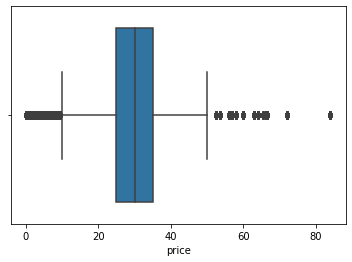

In [32]:
# Boxplot - แสดงการกระจายตัวของคอลัมน์ price
sns.boxplot(x=df_book['price'])

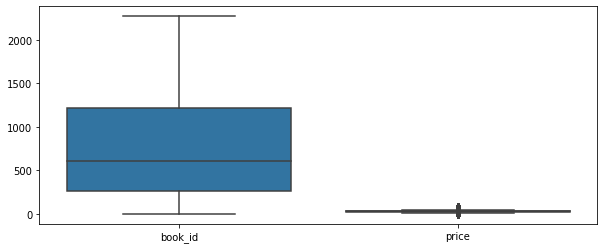

In [33]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df_book[['book_id', 'price']])

### Histogram

BarPlot

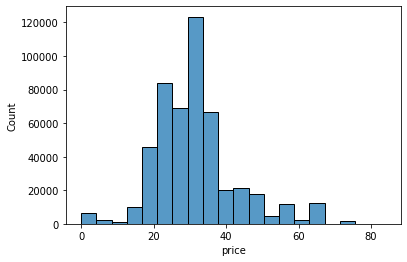

In [34]:
sns.histplot(df_book['price'], bins=20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


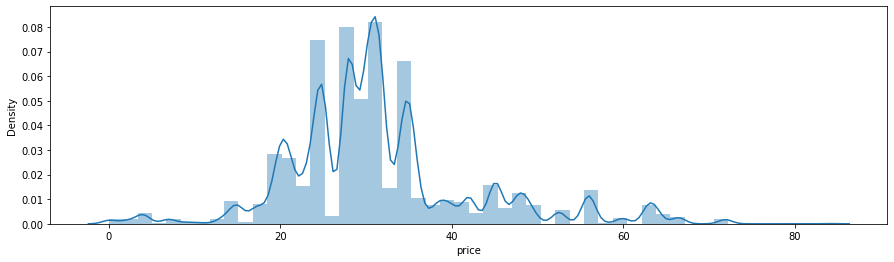

In [35]:
plt.figure(figsize=(15,4))
sns.distplot(df_book['price'])

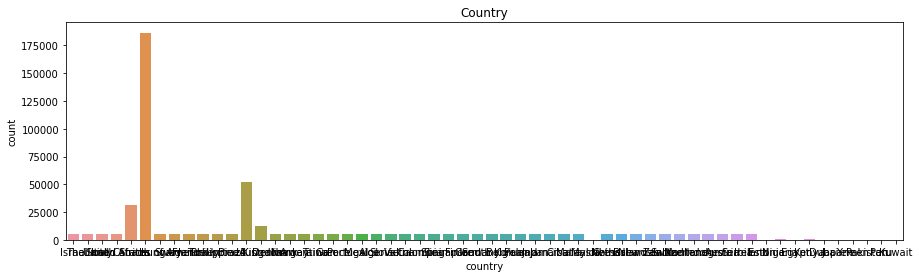

In [36]:
plt.figure(figsize=(15,4))
plt.title('Country')
sns.countplot(x='country', data=df_book)

### Scatterplot

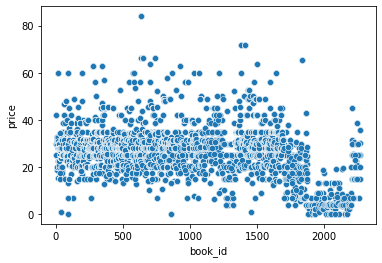

In [37]:
sns.scatterplot(x=df_book['book_id'], y=df_book['price'])

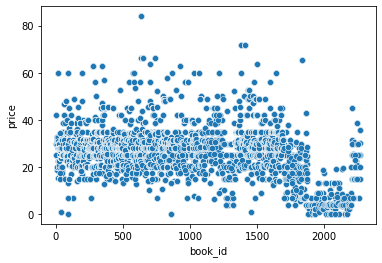

In [38]:
sns.scatterplot(x=df_book.book_id, y=df_book.price)

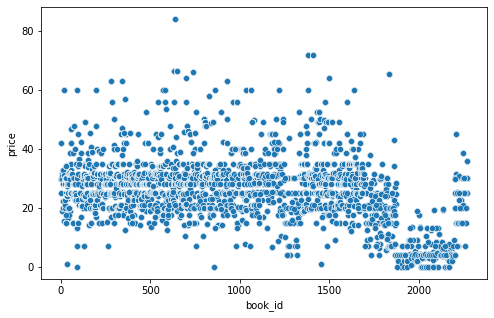

In [39]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='book_id', y='price', data=df_book)

/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:26: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


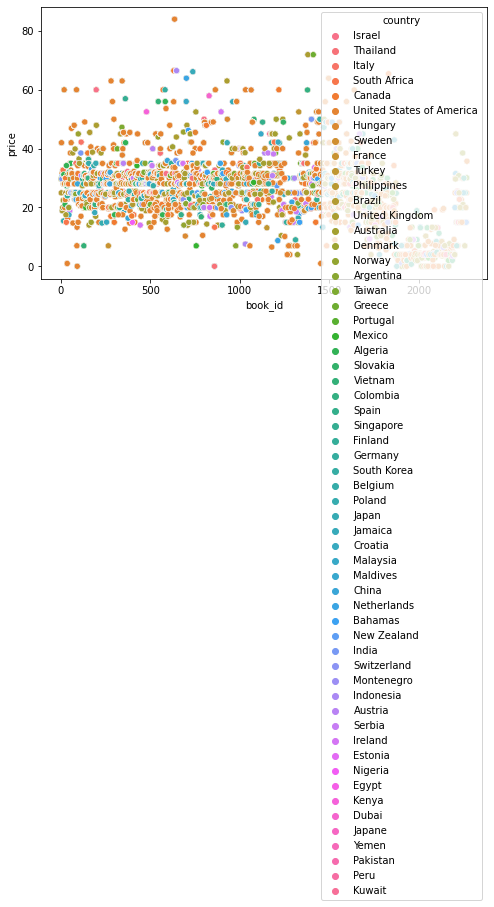

In [40]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='book_id', y='price', data=df_book,
                hue='country')

### JoinJPlot

<Figure size 1080x288 with 0 Axes>

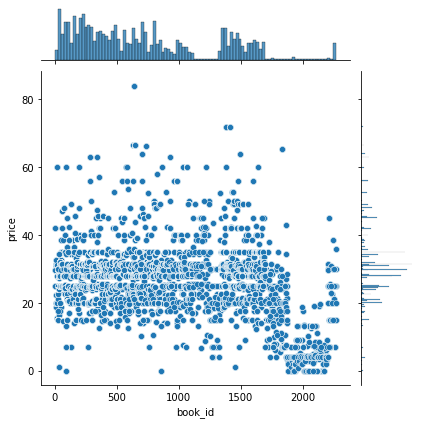

In [41]:
plt.figure(figsize=(15,4))
sns.jointplot(x='book_id', y='price', data=df_book)

### Plotly

In [42]:
import plotly.express as px

fig = px.scatter(df_book, 'book_id', 'price')
fig.show()

# Step 4) Data Cleansing with Spark

มาทำความสะอาดข้อมูลด้วย Spark

### แปลง Data Type 

ตรวจสอบ Type ของคอลัมน์ถูกต้องไหม เปลี่ยน Data Type ให้ตรงกับ Type

In [43]:
data_book.printSchema()

root
 |-- timestamp: string (nullable = true)
 |-- user_id: string (nullable = true)
 |-- book_id: integer (nullable = true)
 |-- country: string (nullable = true)
 |-- price: double (nullable = true)



สังเกตุว่าคอลัมน์ timestamp ชนิดข้อมูลเป็น string ต้องเปลี่ยน data time แต่ต้องคอลัมน์ timestamp แสดงเลขวันที่ เดือน ปี อันไหนขึ้นก่อน (DD/MM/YYYY หรือ MM/DD/YYYY)

In [44]:
data_book.select('timestamp').show()

+-------------------+
|          timestamp|
+-------------------+
|2021-05-01 08:03:44|
|2021-05-02 02:48:34|
|2021-05-01 16:54:57|
|2021-05-01 21:45:28|
|2021-05-01 14:50:52|
|2021-05-01 08:41:48|
|2021-05-01 05:51:43|
|2021-05-01 00:01:09|
|2021-05-01 00:21:24|
|2021-05-01 01:34:23|
|2021-05-01 01:42:10|
|2021-05-01 03:38:00|
|2021-05-01 04:32:25|
|2021-05-01 04:48:06|
|2021-05-01 05:00:49|
|2021-05-01 06:20:44|
|2021-05-01 06:46:35|
|2021-05-01 07:33:54|
|2021-05-01 09:14:11|
|2021-05-01 10:01:44|
+-------------------+
only showing top 20 rows



คอลัมน์ timestamp แสดงเลขวันที่ yyyy-MM-dd HH:mm:ss



In [45]:
from pyspark.sql import functions as f

In [46]:
data_book = data_book.withColumn('timestamp',
                                 f.to_timestamp(data_book.timestamp,
                                                'yyyy-MM-dd HH:mm:ss'))

In [47]:
data_book.printSchema()

root
 |-- timestamp: timestamp (nullable = true)
 |-- user_id: string (nullable = true)
 |-- book_id: integer (nullable = true)
 |-- country: string (nullable = true)
 |-- price: double (nullable = true)



In [48]:
data_book.show(5)

+-------------------+--------+-------+------------+-----+
|          timestamp| user_id|book_id|     country|price|
+-------------------+--------+-------+------------+-----+
|2021-05-01 08:03:44|824dc295|      2|      Israel|24.95|
|2021-05-02 02:48:34|f80fe106|      6|    Thailand|31.49|
|2021-05-01 16:54:57|01cb9fe0|      9|       Italy|29.65|
|2021-05-01 21:45:28|59508f47|     13|South Africa| 22.4|
|2021-05-01 14:50:52|3553ebbb|     14|      Canada| 28.0|
+-------------------+--------+-------+------------+-----+
only showing top 5 rows



สังเกตุว่าคอลัมน์ timestamp data type เป็น timestamp (datetime) แล้ว

ถ้าคอลัมน์ที่เป็นตัวเลขต้องการแปลงชนิดให้ถูกต้อง เช่น คอลัมน์ price ถ้าเปิด Type ไม่ตรงกับข้อมูล แปลงเป็น int

In [49]:
data_book = data_book.withColumn('price',
                                 data_book['price'].cast('double'))

In [50]:
data_book.printSchema()

root
 |-- timestamp: timestamp (nullable = true)
 |-- user_id: string (nullable = true)
 |-- book_id: integer (nullable = true)
 |-- country: string (nullable = true)
 |-- price: double (nullable = true)



## Anomalies Check

ใช้ Spark ตามหาสิ่งที่ผิดปกติในข้อมูล

### ความผิดปกติ 1) Syntactical Anomalies
**Lexical errors** เช่น สะกดผิด

ตรวจสอบประเทศที่สะกดผิด

In [51]:
# นับประเทศใน Data set ในนี้มีกี่ประเทศที่ไม่ซ้ำกัน
data_book.select('country').distinct().count()

58

show ชื่อประเทศทั้งหมดโดย sort เรียงตามตัวอักษร เพื่อดูประเทศที่สะกดผิด

In [52]:
data_book.select('country').distinct().sort('country').show(58, False)

+------------------------+
|country                 |
+------------------------+
|Algeria                 |
|Argentina               |
|Australia               |
|Austria                 |
|Bahamas                 |
|Belgium                 |
|Brazil                  |
|Canada                  |
|China                   |
|Colombia                |
|Croatia                 |
|Denmark                 |
|Dubai                   |
|Egypt                   |
|Estonia                 |
|Finland                 |
|France                  |
|Germany                 |
|Greece                  |
|Hungary                 |
|India                   |
|Indonesia               |
|Ireland                 |
|Israel                  |
|Italy                   |
|Jamaica                 |
|Japan                   |
|Japane                  |
|Kenya                   |
|Kuwait                  |
|Malaysia                |
|Maldives                |
|Mexico                  |
|Montenegro              |
|

Japane ประเทศที่สะกดผิด 

In [53]:
# มีทั้งหมด 106 แถวที่ผิด
data_book.where(data_book['country'] == 'Japane' ).count()

106

In [54]:
data_book.where(data_book['country'] == 'Japane' ).show()

+-------------------+--------+-------+-------+-----+
|          timestamp| user_id|book_id|country|price|
+-------------------+--------+-------+-------+-----+
|2021-05-01 13:11:11|a904217a|   1129| Japane|29.65|
|2021-05-02 10:27:42|a6052e97|   1466| Japane| 35.0|
|2021-05-04 10:44:41|a0f44c26|   1497| Japane|17.49|
|2021-05-04 05:40:46|ad0f9907|   2269| Japane|35.71|
|2021-05-05 01:08:25|aa169f5d|   1378| Japane|59.93|
|2021-05-04 17:42:32|a28e3c68|   1411| Japane|29.99|
|2021-05-05 16:29:39|a909212e|   1652| Japane|24.99|
|2021-05-06 23:10:29|a7b05d98|   1420| Japane|30.79|
|2021-05-07 22:18:42|a169255e|   1459| Japane|25.08|
|2021-05-08 06:06:15|ab2159d6|   1035| Japane|22.67|
|2021-05-09 02:46:06|a6cba2fc|   1928| Japane|  7.0|
|2021-05-09 12:12:35|a0e31842|   1358| Japane|34.99|
|2021-05-11 16:33:19|a2bc5460|   1616| Japane|29.65|
|2021-05-12 22:32:52|af75e4d1|   1603| Japane|18.89|
|2021-05-12 19:14:33|a0accb45|   1934| Japane| 1.95|
|2021-05-13 05:23:12|abfe1e79|   1368| Japane|

เปลี่ยนชื่อประเทศ Japane ให้เป็น Japan

In [55]:
from pyspark.sql.functions import when

In [56]:
clean_data_book = data_book.withColumn('CountryUpdate',
                                       when(data_book['country'] == 'Japane', 'Japan')\
                                       .otherwise(data_book['country']))

In [57]:
# มี CountryUpdate เป็นคอลัมน์ใหม่ที่ Clean ชื่อประเทศที่สะกดผิด
clean_data_book.show()

+-------------------+--------+-------+--------------------+-----+--------------------+
|          timestamp| user_id|book_id|             country|price|       CountryUpdate|
+-------------------+--------+-------+--------------------+-----+--------------------+
|2021-05-01 08:03:44|824dc295|      2|              Israel|24.95|              Israel|
|2021-05-02 02:48:34|f80fe106|      6|            Thailand|31.49|            Thailand|
|2021-05-01 16:54:57|01cb9fe0|      9|               Italy|29.65|               Italy|
|2021-05-01 21:45:28|59508f47|     13|        South Africa| 22.4|        South Africa|
|2021-05-01 14:50:52|3553ebbb|     14|              Canada| 28.0|              Canada|
|2021-05-01 08:41:48|ea28260a|     16|United States of ...|31.18|United States of ...|
|2021-05-01 05:51:43|ff44767e|     18|United States of ...|59.99|United States of ...|
|2021-05-01 00:01:09|b07799e7|     20|              Canada| 28.0|              Canada|
|2021-05-01 00:21:24|9d2e93c8|     20|     

In [58]:
# นับชื่อประเทศใหม่จะ 57 ประเทศ
clean_data_book.select('CountryUpdate').distinct().count()

57

In [59]:
# show ชื่อประเทศทั้งหมดโดย sort เรียงตามตัวอักษร เพื่อดูประเทศที่สะกดผิดอีกรอบ
clean_data_book.select('CountryUpdate').distinct().sort('CountryUpdate').show(57, False)

+------------------------+
|CountryUpdate           |
+------------------------+
|Algeria                 |
|Argentina               |
|Australia               |
|Austria                 |
|Bahamas                 |
|Belgium                 |
|Brazil                  |
|Canada                  |
|China                   |
|Colombia                |
|Croatia                 |
|Denmark                 |
|Dubai                   |
|Egypt                   |
|Estonia                 |
|Finland                 |
|France                  |
|Germany                 |
|Greece                  |
|Hungary                 |
|India                   |
|Indonesia               |
|Ireland                 |
|Israel                  |
|Italy                   |
|Jamaica                 |
|Japan                   |
|Kenya                   |
|Kuwait                  |
|Malaysia                |
|Maldives                |
|Mexico                  |
|Montenegro              |
|Netherlands             |
|

 เอาคอลัมน์ CountryUpdate ไปแทนที่คอลัมน์ Country


In [60]:
clean_data_book = clean_data_book.drop('country').withColumnRenamed('CountryUpdate', 'country')
clean_data_book.show(5)

+-------------------+--------+-------+-----+------------+
|          timestamp| user_id|book_id|price|     country|
+-------------------+--------+-------+-----+------------+
|2021-05-01 08:03:44|824dc295|      2|24.95|      Israel|
|2021-05-02 02:48:34|f80fe106|      6|31.49|    Thailand|
|2021-05-01 16:54:57|01cb9fe0|      9|29.65|       Italy|
|2021-05-01 21:45:28|59508f47|     13| 22.4|South Africa|
|2021-05-01 14:50:52|3553ebbb|     14| 28.0|      Canada|
+-------------------+--------+-------+-----+------------+
only showing top 5 rows



In [61]:
data_book = clean_data_book 

### ความผิดปกติ 2) Semantic Anomalies

**Integrity constraints**: ค่าอยู่นอกเหนือขอบเขตของค่าที่รับได้ เช่น
- user_id: ค่าจะต้องเป็นตัวเลขหรือตัวหนังสือ 8 ตัวอักษร

ตรวจสอบ user_id หน้าตาข้อมูลเป็นอย่างไร

In [62]:
data_book.select('user_id').show()

+--------+
| user_id|
+--------+
|824dc295|
|f80fe106|
|01cb9fe0|
|59508f47|
|3553ebbb|
|ea28260a|
|ff44767e|
|b07799e7|
|9d2e93c8|
|612db483|
|afad01ae|
|3b68cda1|
|c9a899f6|
|d15f0e77|
|032e717b|
|a8558738|
|b0ef795f|
|c46cc3da|
|54bd51eb|
|c52587cc|
+--------+
only showing top 20 rows



In [63]:
# นับจำนวน user_id ทั้งหมด
data_book.select('user_id').count()

500000

หาว่า user_id ตรงตามรูปแบบ 8 ตัวเช่น 824dc295 นี้หรือไม่ และแทนที่ด้วยค่าที่ใกล้เคียงถ้าไม่ตรง

ดูว่า user_id ตรงตามรูปแบบที่เราต้องการ มีกี่แถว

คำใบ้: ใช้เว็บไซต์ https://www.regex101.com เพื่อสร้าง Regular Expression ตามรูปแบบที่เราต้องการ

In [64]:
data_book.where(data_book['user_id'].rlike('^[A-Za-z0-9]{8}$')).count()

499996

user_id ที่มี 8 ตำแหน่งทั้งหมด 499996 และที่เหลืออีก 4 แถวมี user_id ที่อยู่นอกเหนือขอบเขตของค่าที่รับ

![](https://file.designil.com/MmVhZf+)

In [178]:
# ตัวแปรเข้าไปหาพื้นที่สีฟ้า ใช้ filter/where
correct_userid = data_book.filter(data_book['user_id'].rlike('^[A-Za-z0-9]{8}$'))

# พื้นที่สีแดงหาข้อมูลที่ผิด เอา data_book - พื้นที่สีแดง
incorrect_userid = data_book.subtract(correct_userid)

incorrect_userid.show()

+-------------------+-------+-----+--------------------+----------+
|          timestamp|book_id|price|             country|   user_id|
+-------------------+-------+-----+--------------------+----------+
|2021-07-15 18:53:09|    322|30.79|United States of ...|ca86d17200|
|2021-06-19 16:00:22|   2269|35.71|United States of ...|ca86d17200|
+-------------------+-------+-----+--------------------+----------+



In [179]:
incorrect_userid.count()

2

ข้อมูล user_id ที่ผิดแสดง null และรหัสไอดี 10 ตำแหน่งซึ่งเกินมา 2 ค่า

มาทำการแก้ไข user_id นี้ให้ถูกต้องกัน (ตัวที่เป็น null ยังไม่ต้องแก้ไข)

In [185]:
clean_data_book_userid = data_book.withColumn('user_id_update',
                                              when(data_book['user_id'] == 'ca86d17200', 'ca86d172')\
                                              .otherwise(data_book['user_id']))

In [186]:
clean_data_book_userid.where(clean_data_book_userid['user_id_update'].rlike('^[A-Za-z0-9]{8}$')).count()

500000

ข้อมูล clean_data_book_userid ถูกแกไข user_id = ca86d17200 เป็น ca86d172 ถูกแก้ไขเพียง 2 แถวจึงแก้ไขเรียบร้อย ส่วน null ปล่อยไว้

In [187]:
# เอาคอลัมน์ user_id_update ไปแทนที่ user_id
clean_data_book_userid = clean_data_book_userid.drop('user_id').withColumnRenamed('user_id_update', 'user_id')

In [188]:
clean_data_book_userid.show()

+-------------------+-------+-----+--------------------+--------+
|          timestamp|book_id|price|             country| user_id|
+-------------------+-------+-----+--------------------+--------+
|2021-05-01 08:03:44|      2|24.95|              Israel|824dc295|
|2021-05-02 02:48:34|      6|31.49|            Thailand|f80fe106|
|2021-05-01 16:54:57|      9|29.65|               Italy|01cb9fe0|
|2021-05-01 21:45:28|     13| 22.4|        South Africa|59508f47|
|2021-05-01 14:50:52|     14| 28.0|              Canada|3553ebbb|
|2021-05-01 08:41:48|     16|31.18|United States of ...|ea28260a|
|2021-05-01 05:51:43|     18|59.99|United States of ...|ff44767e|
|2021-05-01 00:01:09|     20| 28.0|              Canada|b07799e7|
|2021-05-01 00:21:24|     20| 28.0|             Hungary|9d2e93c8|
|2021-05-01 01:34:23|     20| 28.0|              Sweden|612db483|
|2021-05-01 01:42:10|     20| 28.0|              France|afad01ae|
|2021-05-01 03:38:00|     20| 28.0|              Canada|3b68cda1|
|2021-05-0

In [189]:
data_book = clean_data_book_userid

### ความผิดปกติ 3) Missing values

การเช็คและแก้ไข Missing Values (หากจำเป็น)

ค่า Missing Value คือ ค่าที่ว่างเปล่า

เราจะรู้ได้ยังไงว่าคอลัมน์ไหนมีค่าว่างเปล่ากี่ค่า

In [72]:
# col = คำสั่ง Spark ในการเลือกคอลัมน์
# sum = คำสั่ง Spark ในการคิดผลรวม
from pyspark.sql.functions import col, sum

dt_nulllist = clean_data_book_userid.select([ sum(col(colname).isNull().cast("int")).alias(colname) for colname in clean_data_book_userid.columns ])
dt_nulllist.show()

+---------+-------+-------+-----+-------+
|timestamp|user_id|book_id|price|country|
+---------+-------+-------+-----+-------+
|        0|      2|      0|    0|      0|
+---------+-------+-------+-----+-------+



คอลัมน์ user_id มี Missing Value 2 ค่า

In [73]:
# อีกวิธีหาค่า Missing Value 
clean_data_book_userid.summary('count').show()

+-------+-------+-------+------+-------+
|summary|user_id|book_id| price|country|
+-------+-------+-------+------+-------+
|  count| 499998| 500000|500000| 500000|
+-------+-------+-------+------+-------+



In [74]:
clean_data_book_userid.where(clean_data_book_userid.user_id.isNull()).show()

+-------------------+-------+-------+-----+-------+
|          timestamp|user_id|book_id|price|country|
+-------------------+-------+-------+-----+-------+
|2021-05-01 14:41:20|   null|    516|27.37| Brazil|
|2021-06-30 02:27:00|   null|   1390|27.99|  Japan|
+-------------------+-------+-------+-----+-------+



เปลี่ยนค่า null ในคอลัมน์ user_id ด้วย 00000000

In [75]:
clean_data_book_userid = clean_data_book_userid.withColumn('user_id_update', 
                                                           when(clean_data_book_userid['user_id'].isNull(),
                                                                '00000000').otherwise(clean_data_book_userid['user_id']))

In [76]:
# drop คอลัมน์ user_id อันเก่าแล้วแทนคอลัมน์ที่สร้างขึ้น
clean_data_book_userid = clean_data_book_userid.drop('user_id').withColumnRenamed('user_id_update', 'user_id')

In [77]:
# เช็คว่า user ID ที่เป็น NULL หายไปแล้วจริงมั้ย
clean_data_book_userid.where(clean_data_book_userid.user_id.isNull()).show()

+---------+-------+-----+-------+-------+
|timestamp|book_id|price|country|user_id|
+---------+-------+-----+-------+-------+
+---------+-------+-----+-------+-------+



In [78]:
data_book = clean_data_book_userid

### ความผิดปกติ 4) Outliers:

ข้อมูลที่สูงหรือต่ำผิดปกติจากข้อมูลส่วนใหญ่

มาลองใช้ Boxplot ในการหาค่า Outlier ของราคาหนังสือ

In [79]:
df_book_clean = data_book.toPandas()

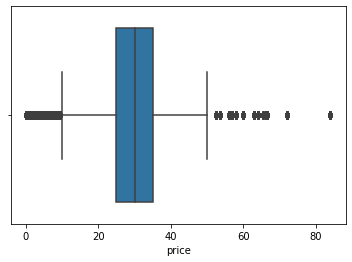

In [80]:
sns.boxplot(x=df_book_clean['price'])

สังเกตุว่ามีหนังสือบางเล่มราคาสูงกว่า $80 เช็คว่าหนังสือ book_id ไหนที่ราคาเกิน

In [81]:
data_book.where(data_book.price > 80).select('book_id').distinct().show()

+-------+
|book_id|
+-------+
|    635|
+-------+



In [82]:
data_book.where(data_book.book_id == '635').show()

+-------------------+-------+-----+--------------------+--------+
|          timestamp|book_id|price|             country| user_id|
+-------------------+-------+-----+--------------------+--------+
|2021-05-01 06:50:22|    635| 84.0|United States of ...|fbabbcc2|
|2021-05-01 21:35:14|    635| 84.0|         Philippines|462870bf|
|2021-05-02 07:07:22|    635| 84.0|United States of ...|c1fcb5d3|
|2021-05-06 03:47:10|    635| 84.0|United States of ...|f4d9ea33|
|2021-05-06 14:24:42|    635| 84.0|United States of ...|fedc5a3c|
|2021-05-08 01:31:52|    635| 84.0|United States of ...|70764a0c|
|2021-05-08 09:10:25|    635| 84.0|              Brazil|14423df6|
|2021-05-09 09:52:46|    635| 84.0|              Taiwan|adc3080b|
|2021-05-09 10:39:43|    635| 84.0|              Mexico|dd5406d8|
|2021-05-09 14:42:19|    635| 84.0|            Colombia|5da74702|
|2021-05-10 17:23:47|    635| 84.0|United States of ...|8f450334|
|2021-05-10 19:40:27|    635| 84.0|United States of ...|f5b8e933|
|2021-05-1

เอาไปเช็คในข้อมูลจาก Workshop 1 ก็จะพบว่า Book_ID = 635 คือ หนังสือชื่อ "The Power Broker"

มีราคา $84 จริง และเป็นหนังสือเสียงที่มีความยาวถึง 66 ชั่วโมงถือว่าหนังสือนี้ Outlier จริงแต่ไม่ได้เป็นข้อมูลที่ผิด จึงไม่ต้องแก้หรือ drop 

![](https://file.designil.com/7h1WIp+)

# Clean ข้อมูลด้วย Spark SQL

In [83]:
# แปลงข้อมูลจาก Spark DataFrame ให้เป็น TempView ก่อน
# เอาตัวแปรแรกที่แปลงข้อมูลเป็น Spark
data_book_backup.createOrReplaceTempView('book')
alldata_book = spark.sql('SELECT * FROM book')
alldata_book.show()

+-------------------+--------+-------+--------------------+-----+
|          timestamp| user_id|book_id|             country|price|
+-------------------+--------+-------+--------------------+-----+
|2021-05-01 08:03:44|824dc295|      2|              Israel|24.95|
|2021-05-02 02:48:34|f80fe106|      6|            Thailand|31.49|
|2021-05-01 16:54:57|01cb9fe0|      9|               Italy|29.65|
|2021-05-01 21:45:28|59508f47|     13|        South Africa| 22.4|
|2021-05-01 14:50:52|3553ebbb|     14|              Canada| 28.0|
|2021-05-01 08:41:48|ea28260a|     16|United States of ...|31.18|
|2021-05-01 05:51:43|ff44767e|     18|United States of ...|59.99|
|2021-05-01 00:01:09|b07799e7|     20|              Canada| 28.0|
|2021-05-01 00:21:24|9d2e93c8|     20|             Hungary| 28.0|
|2021-05-01 01:34:23|612db483|     20|              Sweden| 28.0|
|2021-05-01 01:42:10|afad01ae|     20|              France| 28.0|
|2021-05-01 03:38:00|3b68cda1|     20|              Canada| 28.0|
|2021-05-0

แสดงประเทศโดยเรียตามตัวอักษรด้วย Spark SQL

In [84]:
alldata_book_country = spark.sql(""" 
SELECT distinct country
FROM book
ORDER BY country """)

alldata_book_country.count()

58

In [85]:
alldata_book_country.show(58)

+--------------------+
|             country|
+--------------------+
|             Algeria|
|           Argentina|
|           Australia|
|             Austria|
|             Bahamas|
|             Belgium|
|              Brazil|
|              Canada|
|               China|
|            Colombia|
|             Croatia|
|             Denmark|
|               Dubai|
|               Egypt|
|             Estonia|
|             Finland|
|              France|
|             Germany|
|              Greece|
|             Hungary|
|               India|
|           Indonesia|
|             Ireland|
|              Israel|
|               Italy|
|             Jamaica|
|               Japan|
|              Japane|
|               Kenya|
|              Kuwait|
|            Malaysia|
|            Maldives|
|              Mexico|
|          Montenegro|
|         Netherlands|
|         New Zealand|
|             Nigeria|
|              Norway|
|            Pakistan|
|                Peru|
|         P

สามารถหาชื่อประเทศที่สะกดผิดด้วย Spark SQL

In [92]:
# ตรวจสอบสะกดผิด Japane มีอยู่ในขอมูลไหม
check_Japane = spark.sql(""" 
SELECT * FROM book
WHERE country = 'Japane'
""")

check_Japane.show()

+-------------------+--------+-------+-------+-----+
|          timestamp| user_id|book_id|country|price|
+-------------------+--------+-------+-------+-----+
|2021-05-01 13:11:11|a904217a|   1129| Japane|29.65|
|2021-05-02 10:27:42|a6052e97|   1466| Japane| 35.0|
|2021-05-04 10:44:41|a0f44c26|   1497| Japane|17.49|
|2021-05-04 05:40:46|ad0f9907|   2269| Japane|35.71|
|2021-05-05 01:08:25|aa169f5d|   1378| Japane|59.93|
|2021-05-04 17:42:32|a28e3c68|   1411| Japane|29.99|
|2021-05-05 16:29:39|a909212e|   1652| Japane|24.99|
|2021-05-06 23:10:29|a7b05d98|   1420| Japane|30.79|
|2021-05-07 22:18:42|a169255e|   1459| Japane|25.08|
|2021-05-08 06:06:15|ab2159d6|   1035| Japane|22.67|
|2021-05-09 02:46:06|a6cba2fc|   1928| Japane|  7.0|
|2021-05-09 12:12:35|a0e31842|   1358| Japane|34.99|
|2021-05-11 16:33:19|a2bc5460|   1616| Japane|29.65|
|2021-05-12 22:32:52|af75e4d1|   1603| Japane|18.89|
|2021-05-12 19:14:33|a0accb45|   1934| Japane| 1.95|
|2021-05-13 05:23:12|abfe1e79|   1368| Japane|

In [166]:
# ใช้ Spark SQL เปลี่ยน Japane เป็น Japan
book_clean_country = spark.sql(""" 
select timestamp, user_id, book_id, 
    case when country = 'Japane' then 'Japan'
    else country 
    end as country,
price
from book
""")

In [88]:
# สังเกตุว่าก่อนยังไม่ clean ด้วย Spark SQL จะมีประเทศอยู่ 58
# เมื่อ clean ข้อมูลประเทศมี 57 ซึ่งถูกต้อง
book_clean_country.select('country').distinct().count()

57

In [89]:
# ตรวจสอบประเทศ Japan แก้ไขแล้วยัง
book_clean_country.select('country').distinct().sort('country').show(57, False)

+------------------------+
|country                 |
+------------------------+
|Algeria                 |
|Argentina               |
|Australia               |
|Austria                 |
|Bahamas                 |
|Belgium                 |
|Brazil                  |
|Canada                  |
|China                   |
|Colombia                |
|Croatia                 |
|Denmark                 |
|Dubai                   |
|Egypt                   |
|Estonia                 |
|Finland                 |
|France                  |
|Germany                 |
|Greece                  |
|Hungary                 |
|India                   |
|Indonesia               |
|Ireland                 |
|Israel                  |
|Italy                   |
|Jamaica                 |
|Japan                   |
|Kenya                   |
|Kuwait                  |
|Malaysia                |
|Maldives                |
|Mexico                  |
|Montenegro              |
|Netherlands             |
|

ตรวจสอบ user_id ที่เกิน 8 หลักโดยช้ Regular Expression

In [93]:
check_userid = spark.sql(""" 
SELECT * FROM book
WHERE user_id NOT RLIKE '^[a-z0-9]{8}$'
""").show()

+-------------------+----------+-------+--------------------+-----+
|          timestamp|   user_id|book_id|             country|price|
+-------------------+----------+-------+--------------------+-----+
|2021-06-19 16:00:22|ca86d17200|   2269|United States of ...|35.71|
|2021-07-15 18:53:09|ca86d17200|    322|United States of ...|30.79|
+-------------------+----------+-------+--------------------+-----+



In [167]:
# เอาตัวแปรที่ clean ชื่อประเทศที่สะกดผิดมาใช้เพราะเราทำความสะอาดมาแล้ว
update_user_id = book_clean_country

In [159]:
# ใช้ Spark SQL (CASE WHEN) ทำความสะอาดคอลัมน์ user_id เกิน 8 หลัก
# และเปลี่ยน null ให้เป็น 00000000
update_user_id = spark.sql(""" 
    select timestamp, 
        case when user_id = 'ca86d17200' then 'ca86d172'
             when user_id IS null then '00000000'
        else user_id
        end user_id,
        book_id, 
        country, 
        price
    from book
""")

update_user_id.show()

+-------------------+--------+-------+--------------------+-----+
|          timestamp| user_id|book_id|             country|price|
+-------------------+--------+-------+--------------------+-----+
|2021-05-01 08:03:44|824dc295|      2|              Israel|24.95|
|2021-05-02 02:48:34|f80fe106|      6|            Thailand|31.49|
|2021-05-01 16:54:57|01cb9fe0|      9|               Italy|29.65|
|2021-05-01 21:45:28|59508f47|     13|        South Africa| 22.4|
|2021-05-01 14:50:52|3553ebbb|     14|              Canada| 28.0|
|2021-05-01 08:41:48|ea28260a|     16|United States of ...|31.18|
|2021-05-01 05:51:43|ff44767e|     18|United States of ...|59.99|
|2021-05-01 00:01:09|b07799e7|     20|              Canada| 28.0|
|2021-05-01 00:21:24|9d2e93c8|     20|             Hungary| 28.0|
|2021-05-01 01:34:23|612db483|     20|              Sweden| 28.0|
|2021-05-01 01:42:10|afad01ae|     20|              France| 28.0|
|2021-05-01 03:38:00|3b68cda1|     20|              Canada| 28.0|
|2021-05-0

In [160]:
# เช็คว่าข้อมูล ca86d17200 หายไปหรือยัง
update_user_id.where(update_user_id.user_id == 'ca86d17200').show()

+---------+-------+-------+-------+-----+
|timestamp|user_id|book_id|country|price|
+---------+-------+-------+-------+-----+
+---------+-------+-------+-------+-----+



In [161]:
update_user_id.where(update_user_id.user_id == '00000000').show()

+-------------------+--------+-------+-------+-----+
|          timestamp| user_id|book_id|country|price|
+-------------------+--------+-------+-------+-----+
|2021-05-01 14:41:20|00000000|    516| Brazil|27.37|
|2021-06-30 02:27:00|00000000|   1390|  Japan|27.99|
+-------------------+--------+-------+-------+-----+



In [168]:
update_user_id.where(update_user_id.country == 'Japane').show()

+---------+-------+-------+-------+-----+
|timestamp|user_id|book_id|country|price|
+---------+-------+-------+-------+-----+
+---------+-------+-------+-------+-----+



In [169]:
spark_sql_book_final = update_user_id

ลองตรวจสอบ Missing Value ด้วย Spark SQL 



1.   Missing Value ใน user_id ค่า null
2.   เช็ค user_id เกิน 8 หลัก
3.   เช็คชื่อประเทศ Japane มีในข้อมูลอีกไหม



In [171]:
spark_sql_book_final.where(spark_sql_book_final.user_id == 'null').show()

+---------+-------+-------+-------+-----+
|timestamp|user_id|book_id|country|price|
+---------+-------+-------+-------+-----+
+---------+-------+-------+-------+-----+



In [172]:
spark_sql_book_final.where(spark_sql_book_final.user_id == 'ca86d17200').show()

+-------------------+----------+-------+--------------------+-----+
|          timestamp|   user_id|book_id|             country|price|
+-------------------+----------+-------+--------------------+-----+
|2021-06-19 16:00:22|ca86d17200|   2269|United States of ...|35.71|
|2021-07-15 18:53:09|ca86d17200|    322|United States of ...|30.79|
+-------------------+----------+-------+--------------------+-----+



In [173]:
spark_sql_book_final.where(spark_sql_book_final.country == 'Japane').show()

+---------+-------+-------+-------+-----+
|timestamp|user_id|book_id|country|price|
+---------+-------+-------+-------+-----+
+---------+-------+-------+-------+-----+



In [175]:
data_book.where(data_book.country == ' Japane').show()

+---------+-------+-----+-------+-------+
|timestamp|book_id|price|country|user_id|
+---------+-------+-----+-------+-------+
+---------+-------+-----+-------+-------+



In [190]:
data_book.where(data_book.user_id == 'ca86d17200').show()

+---------+-------+-----+-------+-------+
|timestamp|book_id|price|country|user_id|
+---------+-------+-----+-------+-------+
+---------+-------+-----+-------+-------+



In [177]:
data_book.where(data_book.user_id == 'null').show()

+---------+-------+-----+-------+-------+
|timestamp|book_id|price|country|user_id|
+---------+-------+-----+-------+-------+
+---------+-------+-----+-------+-------+



นำข้อมูลไป Save ได้เลย

# Step 5) Save data เป็น CSV

โดยปกติแล้ว Spark จะทำการ Save ออกมาเป็นหลายไฟล์ เพราะใช้หลายเครื่องในการประมวลผล

In [191]:
# เซฟเป็น partitioned files (ใช้ multiple workers)
data_book.write.csv('clean_data.csv', header=True)

In [192]:
spark_sql_book_final.write.csv('spark_sql_book.csv', header=True)

Save เป็นไฟล์ได้เดียว

In [193]:
data_book.coalesce(1).write.csv('clean_data_single.csv',  header=True)

spark_sql_book_final.coalesce(1).write.csv('spark_sql_book_single.csv', header=True)                       



### วิธีอ่านไฟล์ที่มีหลาย Part
เช่น กรณีนี้ที่ save แบบหลายไฟล์
- /content/clean_data.csv/part-00000-....csv
- /content/clean_data.csv/part-00001-....csv

In [195]:
all_data_book = spark.read.csv('/content/clean_data.csv/part-*', 
                               header=True, inferSchema=True)

In [197]:
all_data_book_sqpark_sql = spark.read.csv('/content/spark_sql_book.csv/part-*',
                                          header=True, inferSchema=True)

In [201]:
print((all_data_book.count(), len(data_book.columns)))

(500000, 5)


In [202]:
print((all_data_book_sqpark_sql.count(), len(all_data_book_sqpark_sql.columns)))

(500000, 5)
